# Pymaceuticals Inc.
---

### Analysis

-# Observations and Inferences

1. **Capomulin and Ramicane Show Lower Tumor Volumes**: The box plot analysis indicates that mice treated with Capomulin and Ramicane generally have lower final tumor volumes compared to those treated with Infubinol and Ceftamin. This suggests that Capomulin and Ramicane might be more effective in reducing tumor size.

2. **Strong Positive Correlation Between Mouse Weight and Tumor Volume**: The scatter plot and correlation analysis reveal a strong positive correlation (correlation coefficient of 0.84) between mouse weight and average tumor volume for the Capomulin regimen. This implies that heavier mice tend to have larger tumor volumes under Capomulin treatment, which could be an important factor to consider in treatment efficacy studies.

3. **Potential Outliers in Tumor Volume Data**: The box plot analysis identified potential outliers in the tumor volume data for all four treatment regimens. These outliers could indicate individual variability in response to the treatments or possible data anomalies that warrant further investigation.


In [1]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
unique_mice_count = merged_data["Mouse ID"].nunique()
unique_mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = merged_data[merged_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
print("Duplicate entries based on Mouse ID and Timepoint:")
duplicate_mice

Duplicate entries based on Mouse ID and Timepoint:


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID.


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = merged_data[~merged_data["Mouse ID"].isin(duplicate_mice)]

# Display the updated number of unique mice
updated_unique_mice_count = cleaned_data["Mouse ID"].nunique()

# Display the cleaned DataFrame for preview
print("Cleaned Data Preview:")
cleaned_data.head()

Cleaned Data Preview:


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
updated_unique_mice_count

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
# Group by Drug Regimen and calculate the necessary statistics
summary_stats = cleaned_data.groupby("Drug Regimen").agg(
    mean_tumor_volume=("Tumor Volume (mm3)", "mean"),
    median_tumor_volume=("Tumor Volume (mm3)", "median"),
    variance_tumor_volume=("Tumor Volume (mm3)", "var"),
    std_tumor_volume=("Tumor Volume (mm3)", "std"),
    sem_tumor_volume=("Tumor Volume (mm3)", "sem")
).reset_index()

summary_stats


,Drug Regimen,mean_tumor_volume,median_tumor_volume,variance_tumor_volume,std_tumor_volume,sem_tumor_volume
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
# Total number of timepoints for all mice tested for each drug regimen

# Total number of timepoints for all mice tested for each drug regimen
timepoints_count = cleaned_data["Drug Regimen"].value_counts().reset_index()
timepoints_count.columns = ["Drug Regimen", "Total Timepoints"]

print("\nTotal number of timepoints for all mice tested for each drug regimen:")
timepoints_count


Total number of timepoints for all mice tested for each drug regimen:


,Drug Regimen,Total Timepoints
0,Capomulin,230
1,Ramicane,228
2,Ketapril,188
3,Naftisol,186
4,Zoniferol,182
5,Stelasyn,181
6,Placebo,181
7,Infubinol,178
8,Ceftamin,178
9,Propriva,161


## Bar and Pie Charts

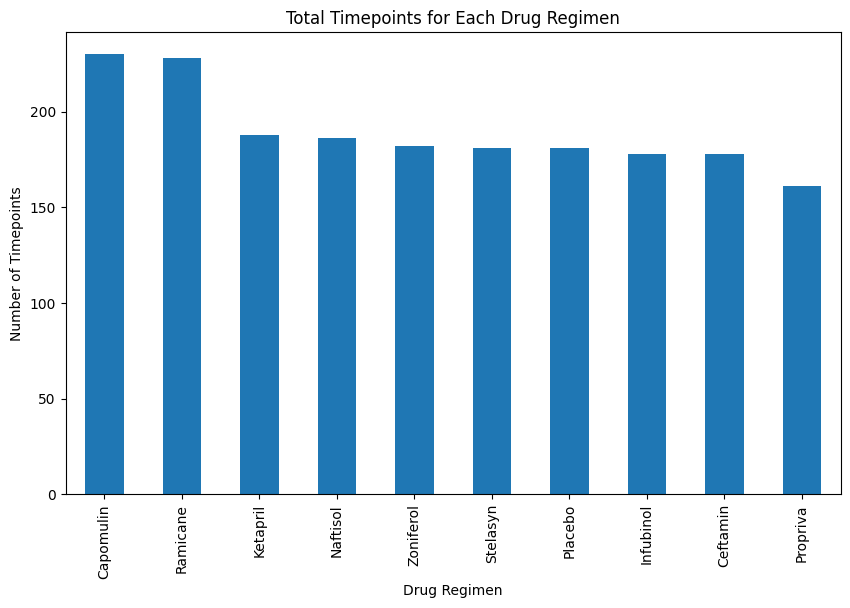

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoints_count = cleaned_data["Drug Regimen"].value_counts()

# Bar plot using Pandas
timepoints_count.plot(kind='bar', figsize=(10,6), title='Total Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')
plt.show()

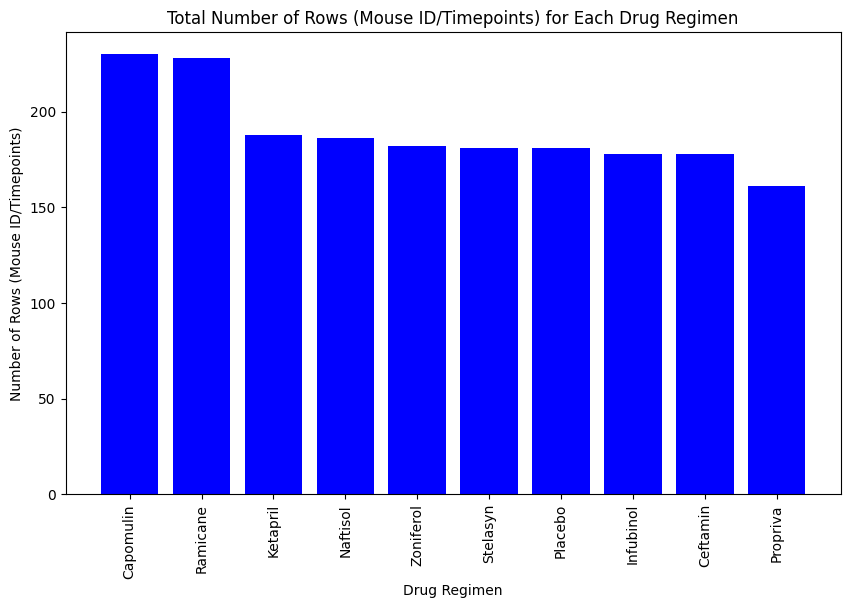

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
timepoints_count = cleaned_data["Drug Regimen"].value_counts()

plt.figure(figsize=(10,6))
plt.bar(timepoints_count.index, timepoints_count.values, color='blue')
plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows (Mouse ID/Timepoints)')
plt.xticks(rotation=90)
plt.show()

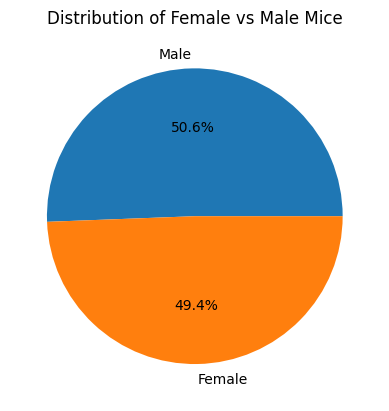

In [11]:
# Calculate the distribution of unique female versus male mice
gender_distribution = cleaned_data["Sex"].value_counts()

# Create the pie chart using Pandas
gender_distribution.plot(kind='pie', autopct='%1.1f%%', title='Distribution of Female vs Male Mice')
plt.ylabel('')
plt.show()

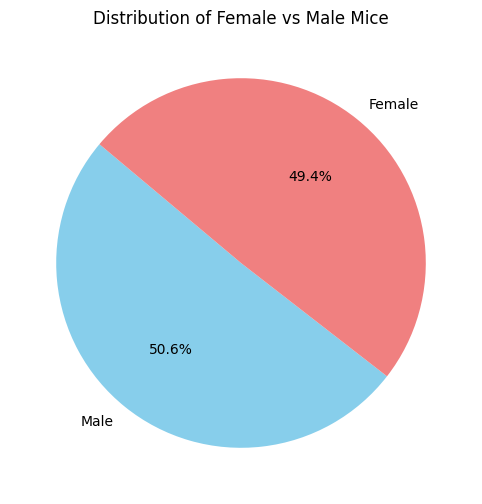

In [12]:
# Calculate the distribution of unique female versus male mice
gender_distribution = cleaned_data["Sex"].value_counts()

# Create the pie chart using pyplot
plt.figure(figsize=(8,6))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Female vs Male Mice')
plt.ylabel('')  # Removes the y-label for better visualization
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:

# Get the last (greatest) timepoint for each mouse
last_timepoint = cleaned_data.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = last_timepoint.merge(cleaned_data, on=["Mouse ID", "Timepoint"], how="left")

# Filter the data for the four treatment regimens
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
filtered_data = final_tumor_volume[final_tumor_volume["Drug Regimen"].isin(treatment_list)]

# Display the filtered data
filtered_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
239,y769,45,68.594745,4,Ceftamin,Female,6,27
240,y793,45,31.896238,2,Capomulin,Male,17,17
241,y865,45,64.729837,3,Ceftamin,Male,23,26
245,z578,45,30.638696,0,Ramicane,Male,11,16


In [14]:
# Create empty list to fill with tumor volume data (for plotting)
tumor_volumes = []

# Calculate the IQR and determine if there are any potential outliers
for drug in treatment_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_data = filtered_data[filtered_data["Drug Regimen"] == drug]["Tumor Volume (mm3)"]
    
    # Append the tumor volumes to the list
    tumor_volumes.append(drug_data)
    
    # Calculate the IQR
    quartiles = drug_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    # Determine outliers
    outliers = drug_data[(drug_data < lower_bound) | (drug_data > upper_bound)]
    
    print(f"{drug} potential outliers: {outliers.values}")

# Output tumor volumes for verification
tumor_volumes

Capomulin potential outliers: []
Ramicane potential outliers: []
Infubinol potential outliers: [36.3213458]
Ceftamin potential outliers: []


[19     38.982878
 24     38.939633
 61     30.485985
 64     37.074024
 66     40.159220
 81     47.685963
 84     37.311846
 86     38.125164
 88     38.753265
 109    41.483008
 116    38.846876
 122    28.430964
 125    33.329098
 163    46.539206
 164    32.377357
 170    41.581521
 175    23.343598
 181    40.728578
 184    34.455298
 193    31.023923
 205    40.658124
 209    39.952347
 221    36.041047
 227    28.484033
 240    31.896238
 Name: Tumor Volume (mm3), dtype: float64,
 6      38.407618
 7      43.047543
 10     38.810366
 12     32.978522
 33     38.342008
 37     33.397653
 45     37.311236
 52     40.659006
 70     29.128472
 77     33.562402
 78     36.374510
 92     31.560470
 94     36.134852
 97     22.050126
 120    30.564625
 127    31.095335
 158    45.220869
 159    36.561652
 167    37.225650
 169    43.419381
 178    30.276232
 191    40.667713
 218    43.166373
 236    44.183451
 245    30.638696
 Name: Tumor Volume (mm3), dtype: float64,
 0      67.973

C:\Users\Wayne He\AppData\Local\Temp\ipykernel_161096\3616944873.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(tumor_volumes, labels=treatment_list, flierprops=dict(marker='o', color='r', markersize=12))


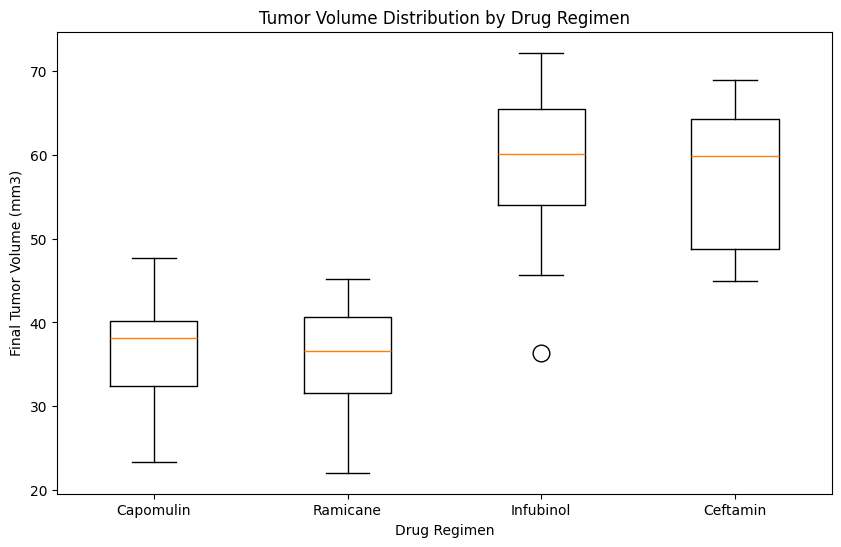

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(tumor_volumes, labels=treatment_list, flierprops=dict(marker='o', color='r', markersize=12))
ax.set_title('Tumor Volume Distribution by Drug Regimen')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

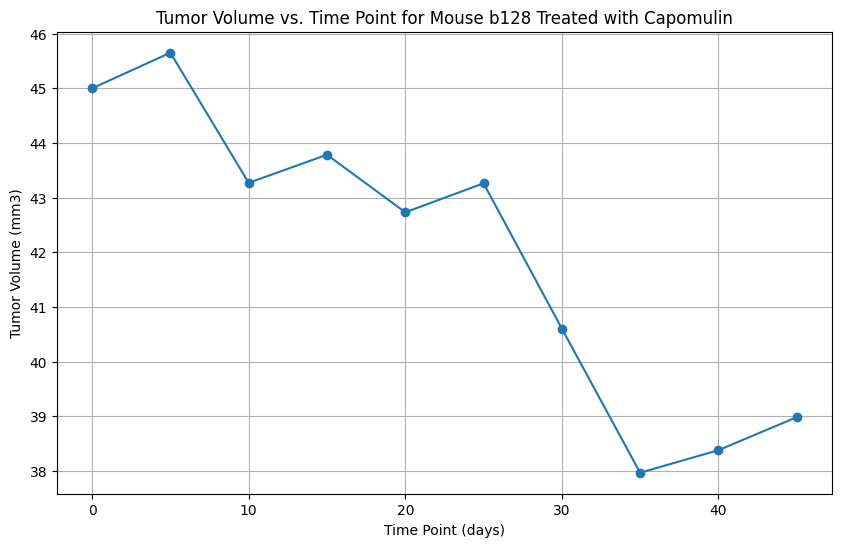

In [16]:
# Filter the data to get the records for the Capomulin regimen
capomulin_data = cleaned_data[cleaned_data["Drug Regimen"] == "Capomulin"]
# Select a single mouse ID
single_mouse_id = capomulin_data["Mouse ID"].iloc[0]  # You can change this to any specific mouse ID
single_mouse_data = capomulin_data[capomulin_data["Mouse ID"] == single_mouse_id]

# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
plt.figure(figsize=(10, 6))
plt.plot(single_mouse_data["Timepoint"], single_mouse_data["Tumor Volume (mm3)"], marker='o')
plt.title(f'Tumor Volume vs. Time Point for Mouse {single_mouse_id} Treated with Capomulin')
plt.xlabel('Time Point (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.show()

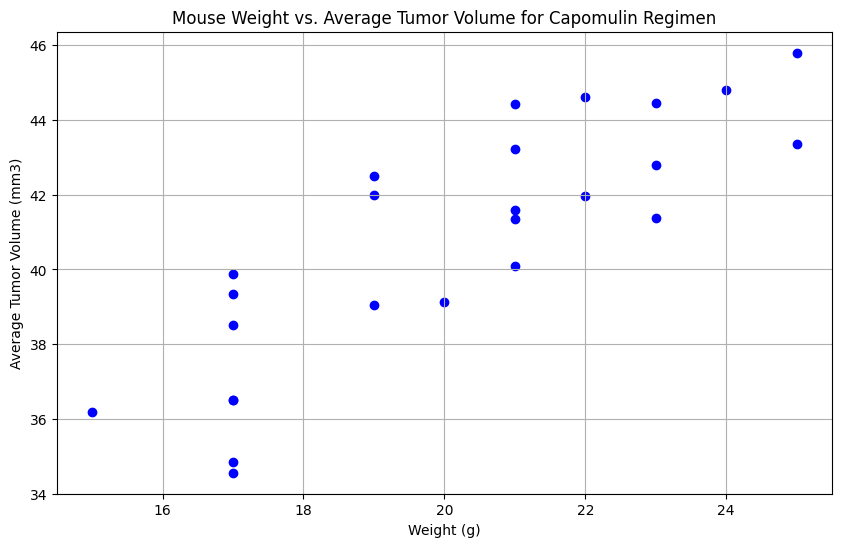

In [17]:
# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby("Mouse ID").agg(
    average_tumor_volume=("Tumor Volume (mm3)", "mean"),
    weight=("Weight (g)", "mean")
).reset_index()

# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.figure(figsize=(10, 6))
plt.scatter(average_tumor_volume["weight"], average_tumor_volume["average_tumor_volume"], marker='o', color='b')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.8419363424694722


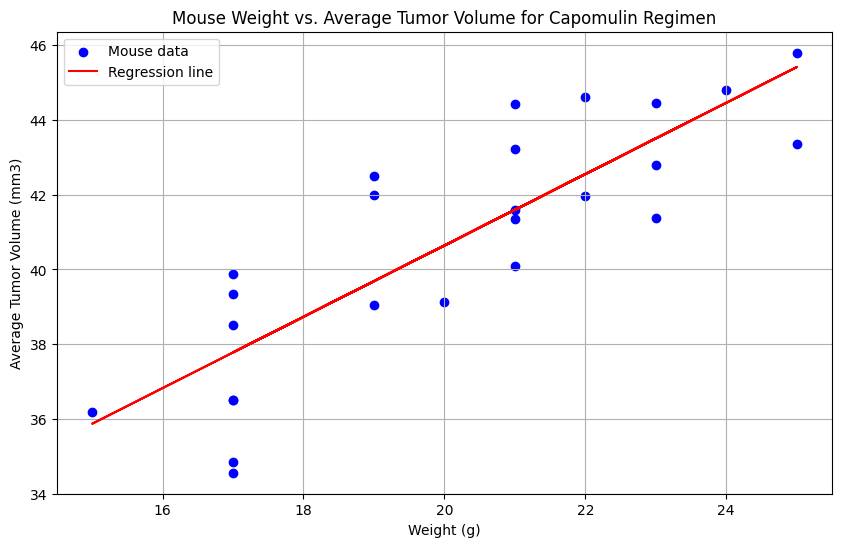

In [18]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Calculate the correlation coefficient
correlation = average_tumor_volume["weight"].corr(average_tumor_volume["average_tumor_volume"])
print(f"The correlation between mouse weight and the average tumor volume is {correlation}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(
    average_tumor_volume["weight"], average_tumor_volume["average_tumor_volume"]
)

# Generate the scatter plot with regression line
plt.figure(figsize=(10, 6))
plt.scatter(average_tumor_volume["weight"], average_tumor_volume["average_tumor_volume"], marker='o', color='b', label='Mouse data')
plt.plot(average_tumor_volume["weight"], slope * average_tumor_volume["weight"] + intercept, color='r', label='Regression line')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()
plt.grid(True)
plt.show()